In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
pd.options.display.max_columns =None
pd.options.display.max_rows =None

In [2]:
df  = pd.read_csv("C://Users//user//OneDrive//Desktop//bank_cleaned.csv")
df.head()
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
40836,45205,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,yes,1
40837,45206,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,yes,1
40838,45207,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,yes,1
40839,45208,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,yes,1
40840,45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,8.47,4,-1,0,unknown,no,0


In [3]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64


In [4]:
df[df.duplicated(keep = 'last')] 

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary


In [5]:
df.shape

(40841, 18)

In [6]:
df.dtypes

Unnamed: 0           int64
age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response            object
response_binary      int64
dtype: object

In [7]:
df.nunique()

Unnamed: 0         40841
age                   75
job                   12
marital                3
education              3
default                2
balance             6350
housing                2
loan                   2
day                   31
month                 12
duration            1539
campaign              47
pdays                510
previous              36
poutcome               3
response               2
response_binary        2
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,response_binary
count,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000,40841.000000
mean,22006.477657,40.790676,1073.981807,15.863666,4.308949,2.774149,32.248304,0.436791,0.113587
std,12919.797651,10.475473,1712.556186,8.313608,4.305823,3.104177,90.738402,1.572342,0.317313
min,0.000000,18.000000,-6847.000000,1.000000,0.100000,1.000000,-1.000000,0.000000,0.000000
25%,10888.000000,33.000000,64.000000,8.000000,1.730000,1.000000,-1.000000,0.000000,0.000000
50%,21652.000000,39.000000,421.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,0.000000
75%,33102.000000,48.000000,1333.000000,21.000000,5.300000,3.000000,-1.000000,0.000000,0.000000
max,45209.000000,95.000000,10443.000000,31.000000,81.970000,58.000000,871.000000,55.000000,1.000000


In [11]:
df.groupby(['education']).size()

education
primary       6528
secondary    21933
tertiary     12380
dtype: int64

In [12]:
df.sample(n=10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
14744,15687,32,management,married,tertiary,no,71,yes,no,21,jul,3.68,8,-1,0,unknown,no,0
27806,29847,30,technician,single,tertiary,no,405,yes,no,4,feb,2.13,1,274,1,failure,no,0
16569,17572,40,admin.,married,secondary,yes,94,no,no,29,jul,1.95,2,-1,0,unknown,no,0
39062,42956,25,student,single,secondary,no,125,no,no,9,feb,3.58,1,92,2,success,yes,1
13198,14089,34,housemaid,divorced,primary,no,46,yes,no,11,jul,0.52,2,-1,0,unknown,no,0
13919,14840,37,entrepreneur,married,tertiary,no,1027,yes,no,16,jul,4.90,2,-1,0,unknown,no,0
29582,31910,30,blue-collar,married,secondary,no,177,yes,no,9,apr,1.03,2,332,3,failure,no,0
35955,39277,33,blue-collar,married,primary,no,-132,yes,yes,18,may,2.83,6,-1,0,unknown,no,0
9848,10489,40,services,married,secondary,no,2346,no,no,16,jun,3.03,3,-1,0,unknown,no,0
10625,11350,44,blue-collar,married,secondary,no,2092,no,yes,18,jun,7.53,1,-1,0,unknown,no,0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.loan = le.fit_transform(df.loan)

df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,4,1,tertiary,no,2143,yes,0,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,10,2,secondary,no,29,yes,0,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,2,1,secondary,no,2,yes,1,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,4,1,tertiary,no,231,yes,0,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,4,2,tertiary,no,447,yes,1,5,may,3.62,1,-1,0,unknown,no,0


In [15]:
df = df.fillna(0)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

x= df[['job','marital']]
y = df[['loan']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
y_train.head()

,loan
29058,0
38366,0
28620,0
22002,0
34113,0


In [40]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
y_test

,loan
11616,1
38206,1
28205,0
7192,0
13375,0
19691,0
92,0
1854,0
31752,0
31494,0


In [41]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [42]:
y_pred = knn.predict(x_test)

In [43]:
confusion_matrix(y_test, y_pred)

array([[7019, 1475],
       [1399,  318]], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7185388306728039

In [45]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred)

(array([0.83380851, 0.17735639]),
 array([0.82634801, 0.18520676]),
 array([0.83006149, 0.18119658]),
 array([8494, 1717], dtype=int64))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

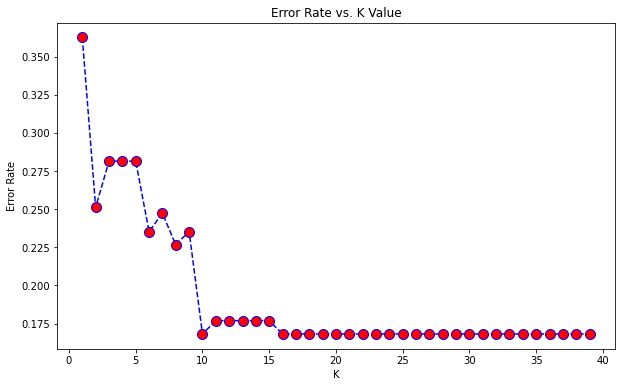

Minimum error:- 0.1681519929487807 at K = 10


In [47]:
from matplotlib import pyplot as plt
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [48]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [49]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8318480070512193

In [50]:
import os
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.tree import DecisionTreeClassifier as dt
###################### Random Forest ############################
from sklearn.ensemble import RandomForestClassifier 

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [52]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
classifier = dt(criterion = 'entropy', random_state = 0)
#classifier = dt(criterion = 'entropy', random_state = 0, max_depth=4)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [54]:
print("Predicted Values : ",Y_pred[1:50])

Predicted Values :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [55]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8309666046420527


[Text(409.4325, 359.38, 'X[1] <= 0.549\nentropy = 0.648\nsamples = 30630\nvalue = [25557, 5073]'),
 Text(208.78500000000003, 317.09999999999997, 'X[0] <= -0.6\nentropy = 0.679\nsamples = 21995\nvalue = [18044, 3951]'),
 Text(96.72, 274.82, 'X[0] <= -0.872\nentropy = 0.72\nsamples = 8415\nvalue = [6742, 1673]'),
 Text(59.52, 232.53999999999996, 'X[0] <= -1.145\nentropy = 0.713\nsamples = 7572\nvalue = [6090, 1482]'),
 Text(29.76, 190.26, 'X[1] <= -1.095\nentropy = 0.745\nsamples = 2378\nvalue = [1874, 504]'),
 Text(14.88, 147.97999999999996, 'entropy = 0.786\nsamples = 511\nvalue = [391, 120]'),
 Text(44.64, 147.97999999999996, 'entropy = 0.733\nsamples = 1867\nvalue = [1483, 384]'),
 Text(89.28, 190.26, 'X[1] <= -1.095\nentropy = 0.698\nsamples = 5194\nvalue = [4216, 978]'),
 Text(74.4, 147.97999999999996, 'entropy = 0.703\nsamples = 509\nvalue = [412, 97]'),
 Text(104.16000000000001, 147.97999999999996, 'entropy = 0.697\nsamples = 4685\nvalue = [3804, 881]'),
 Text(133.92000000000002,

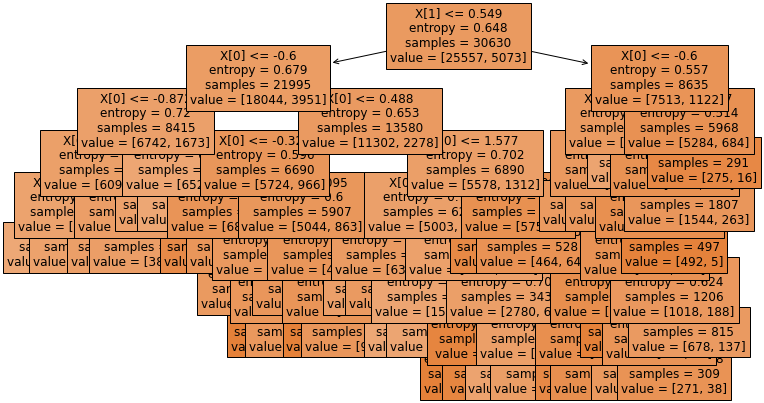

In [56]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(classifier, filled=True, fontsize=12)

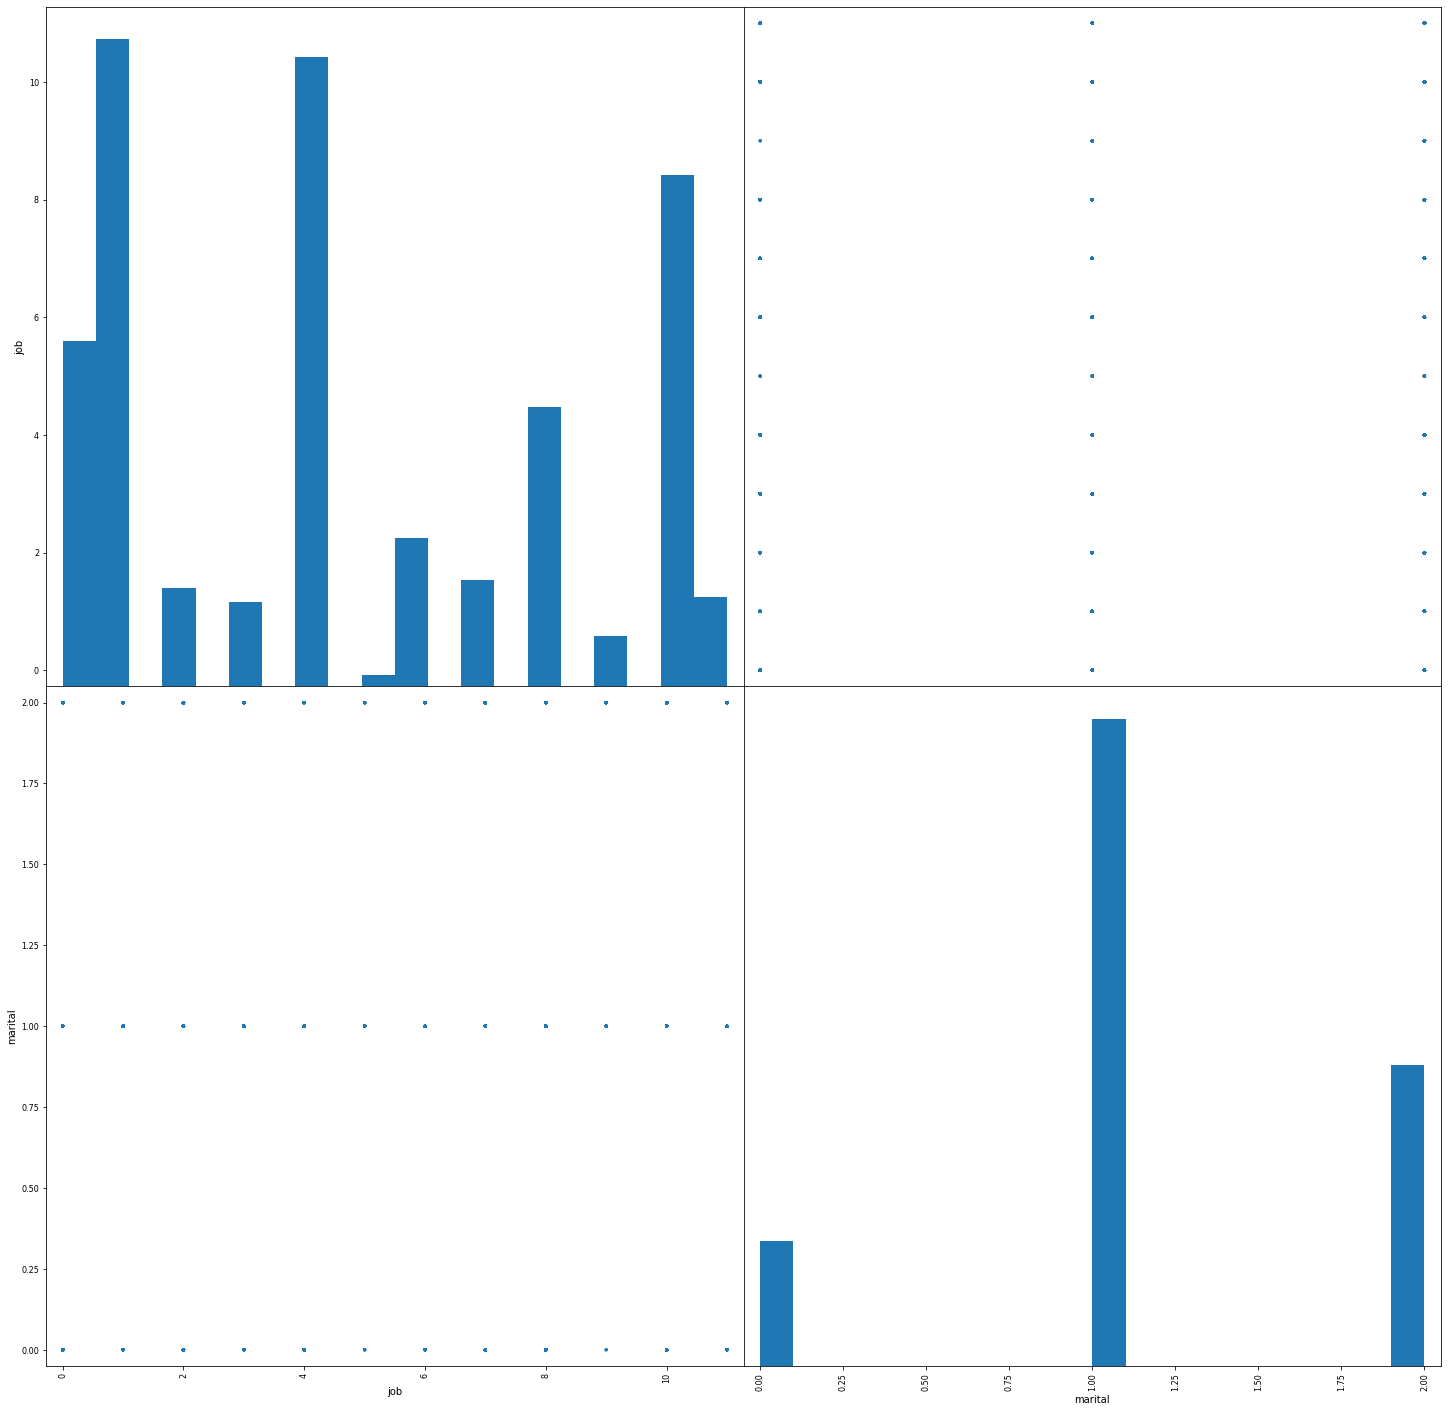

In [57]:
X_dataframe = x

grr = pd.plotting.scatter_matrix(X_dataframe, figsize=(25, 25), marker='o', hist_kwds={'bins': 20}, s=10, alpha=.8)

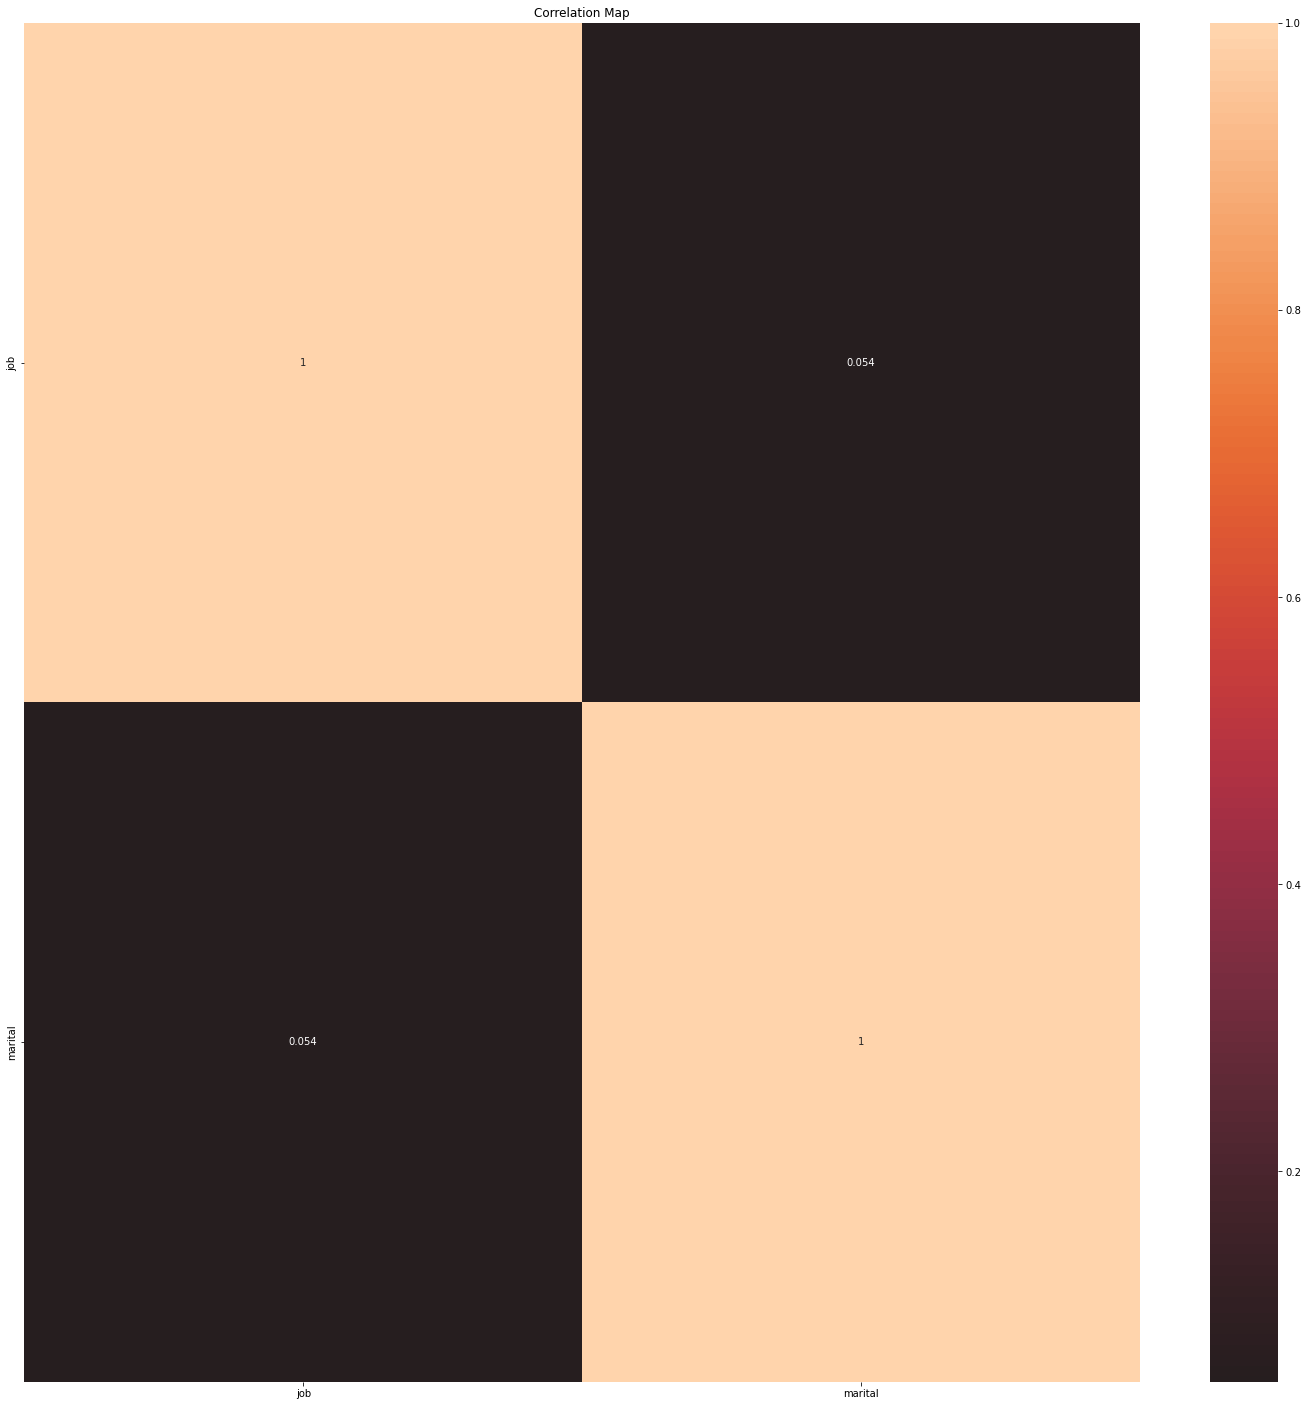

In [58]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(x.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [59]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8309666046420527


In [60]:
#both yield similar accuracy score